In [1]:
import nltk
import gensim.models.word2vec as w2v
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

# Data load and preprocess

In [2]:
def squad_json_to_dataframe_train(input_file_path, record_path = ['data','paragraphs','qas','answers'],
                           verbose = 1):
    """
    input_file_path: path to the squad json file.
    record_path: path to deepest level in json file default value is
    ['data','paragraphs','qas','answers']
    verbose: 0 to suppress it default is 1
    """
    if verbose:
        print("Reading the json file")    
    file = json.loads(open(input_file_path).read())
    if verbose:
        print("processing...")
    # parsing different level's in the json file
    js = pd.io.json.json_normalize(file , record_path )
    m = pd.io.json.json_normalize(file, record_path[:-1] )
    r = pd.io.json.json_normalize(file,record_path[:-2])
    
    #combining it into single dataframe
    idx = np.repeat(r['context'].values, r.qas.str.len())
    ndx  = np.repeat(m['id'].values,m['answers'].str.len())
    m['context'] = idx
    js['q_idx'] = ndx
    main = pd.concat([ m[['id','question','context']].set_index('id'),js.set_index('q_idx')],1,sort=False).reset_index()
    main['c_id'] = main['context'].factorize()[0]
    if verbose:
        print("shape of the dataframe is {}".format(main.shape))
        print("Done")
    return main

In [3]:
# reference: https://www.kaggle.com/sanjay11100/squad-stanford-q-a-json-to-pandas-dataframe
def squad_json_to_dataframe_dev(input_file_path, record_path = ['data','paragraphs','qas','answers'],
                           verbose = 1):
    """
    input_file_path: path to the squad json file.
    record_path: path to deepest level in json file default value is
    ['data','paragraphs','qas','answers']
    verbose: 0 to suppress it default is 1
    """
    if verbose:
        print("Reading the json file")    
    file = json.loads(open(input_file_path).read())
    if verbose:
        print("processing...")
    # parsing different level's in the json file
    js = pd.io.json.json_normalize(file , record_path )
    m = pd.io.json.json_normalize(file, record_path[:-1] )
    r = pd.io.json.json_normalize(file,record_path[:-2])
    
    #combining it into single dataframe
    idx = np.repeat(r['context'].values, r.qas.str.len())
#     ndx  = np.repeat(m['id'].values,m['answers'].str.len())
    m['context'] = idx
#     js['q_idx'] = ndx
    main = m[['id','question','context','answers']].set_index('id').reset_index()
    main['c_id'] = main['context'].factorize()[0]
    if verbose:
        print("shape of the dataframe is {}".format(main.shape))
        print("Done")
    return main

In [4]:
# download squad dataset
!wget "https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v2.0.json"
!wget "https://rajpurkar.github.io/SQuAD-explorer/dataset/dev-v2.0.json"

--2021-07-15 20:22:42--  https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v2.0.json
Resolving rajpurkar.github.io (rajpurkar.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to rajpurkar.github.io (rajpurkar.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42123633 (40M) [application/json]
Saving to: ‘train-v2.0.json’

train-v2.0.json     100%[===================>]  40.17M   158MB/s    in 0.3s    

2021-07-15 20:22:43 (158 MB/s) - ‘train-v2.0.json’ saved [42123633/42123633]

--2021-07-15 20:22:43--  https://rajpurkar.github.io/SQuAD-explorer/dataset/dev-v2.0.json
Resolving rajpurkar.github.io (rajpurkar.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to rajpurkar.github.io (rajpurkar.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4370528 (4.2M) [application/json]
Saving to: ‘dev-v2.0.json’

dev-v2.0.json       1

In [5]:
input_file_path = 'train-v2.0.json'
record_path = ['data','paragraphs','qas','answers']
train = squad_json_to_dataframe_train(input_file_path=input_file_path,record_path=record_path)

Reading the json file
processing...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


shape of the dataframe is (130319, 6)
Done


In [6]:
input_file_path = 'dev-v2.0.json'
record_path = ['data','paragraphs','qas','answers']
verbose = 0
dev = squad_json_to_dataframe_dev(input_file_path=input_file_path,record_path=record_path)

Reading the json file
processing...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


shape of the dataframe is (11873, 5)
Done


In [7]:
train = train[['question', 'context']]
dev = dev[['question', 'context']]
qc = pd.concat([train, dev], ignore_index=True, sort=False)

In [8]:
qc.head()

,question,context
0,When did Beyonce start becoming popular?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
1,What areas did Beyonce compete in when she was...,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
2,When did Beyonce leave Destiny's Child and bec...,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
3,In what city and state did Beyonce grow up?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
4,In which decade did Beyonce become famous?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...


In [9]:
question = qc['question']
question.head()

0             When did Beyonce start becoming popular?
1    What areas did Beyonce compete in when she was...
2    When did Beyonce leave Destiny's Child and bec...
3        In what city and state did Beyonce  grow up? 
4           In which decade did Beyonce become famous?
Name: question, dtype: object

In [10]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
question_sample = question[0:9]

In [13]:
question_sample

0             When did Beyonce start becoming popular?
1    What areas did Beyonce compete in when she was...
2    When did Beyonce leave Destiny's Child and bec...
3        In what city and state did Beyonce  grow up? 
4           In which decade did Beyonce become famous?
5           In what R&B group was she the lead singer?
6        What album made her a worldwide known artist?
7               Who managed the Destiny's Child group?
8                       When did Beyoncé rise to fame?
Name: question, dtype: object

# Model transforming questions to vectors

In [15]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


In [16]:
output_ser = qc.loc[:, 'question'].str.replace('?','').str.split(r'[/\s\\]+')

In [17]:
output_ser[0:3]

0       [When, did, Beyonce, start, becoming, popular]
1    [What, areas, did, Beyonce, compete, in, when,...
2    [When, did, Beyonce, leave, Destiny's, Child, ...
Name: question, dtype: object

In [18]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(output_ser)]

In [19]:
documents[13707]

TaggedDocument(words=['Who', 'became', 'prime', 'minister', 'on', 'June', '12,', '1991'], tags=[13707])

## build doc2vector model

In [20]:
from gensim.models import doc2vec
from gensim.models.doc2vec import Doc2Vec

max_epochs = 2
vec_size = 30
alpha = 0.025 
model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                dm =1,
                seed=1337)




/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [ ]:
model.build_vocab(documents)

## train model

In [ ]:
for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(documents,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


iteration 1


## save/load model

In [21]:
from google.colab import drive

drive.mount('/content/drive')
path="/content/drive/My Drive/Colab Notebooks/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save(path+"save/d2v_3.0.model")
print("Model Saved")

Model Saved


In [22]:
from gensim.models.doc2vec import Doc2Vec

model = Doc2Vec.load(path+'save/d2v_3.0.model')

In [23]:
qc["question_vector"] = model.docvecs.doctag_syn0.tolist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """Entry point for launching an IPython kernel.


In [24]:
len(qc['question_vector'][0])

30

In [25]:
qc.head()

,question,context,question_vector
0,When did Beyonce start becoming popular?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,"[0.007754283491522074, -0.08394172042608261, 0..."
1,What areas did Beyonce compete in when she was...,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,"[-0.07619713991880417, -0.05099334567785263, -..."
2,When did Beyonce leave Destiny's Child and bec...,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,"[-0.14264732599258423, -0.21584434807300568, 0..."
3,In what city and state did Beyonce grow up?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,"[-0.0028559956699609756, -0.017833326011896133..."
4,In which decade did Beyonce become famous?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,"[0.03421950712800026, -0.0005537183023989201, ..."


# Vector visualize

In [26]:
# dimension reduction
! pip install MulticoreTSNE

  Created wheel for MulticoreTSNE: filename=MulticoreTSNE-0.1-cp37-cp37m-linux_x86_64.whl size=68517 sha256=1c603cb42d894af360e2a4672b1777849ab3d95fa58139e135cd48c3f4bf8ebe
  Stored in directory: /root/.cache/pip/wheels/27/59/53/3b52ee63add3692254c30d687fa4dff4d128d0557861fb028e
Successfully built MulticoreTSNE


In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

## PCA visualization

In [29]:
question_vector = model.docvecs.doctag_syn0
question_vector_2d = pca.fit_transform(question_vector)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """Entry point for launching an IPython kernel.


In [30]:
question_vector_2d[0]

array([0.4003004, 0.1648844], dtype=float32)

In [31]:
data = {'question': qc['question'], 
        'x': question_vector_2d[:,0].tolist(), 'y': question_vector_2d[:,1].tolist()} 

points = pd.DataFrame(data)

In [33]:
points.head()

,question,x,y
0,When did Beyonce start becoming popular?,0.400300,0.164884
1,What areas did Beyonce compete in when she was...,0.769540,0.194779
2,When did Beyonce leave Destiny's Child and bec...,0.496360,0.048883
3,In what city and state did Beyonce grow up?,0.205058,0.289164
4,In which decade did Beyonce become famous?,0.045611,0.105497


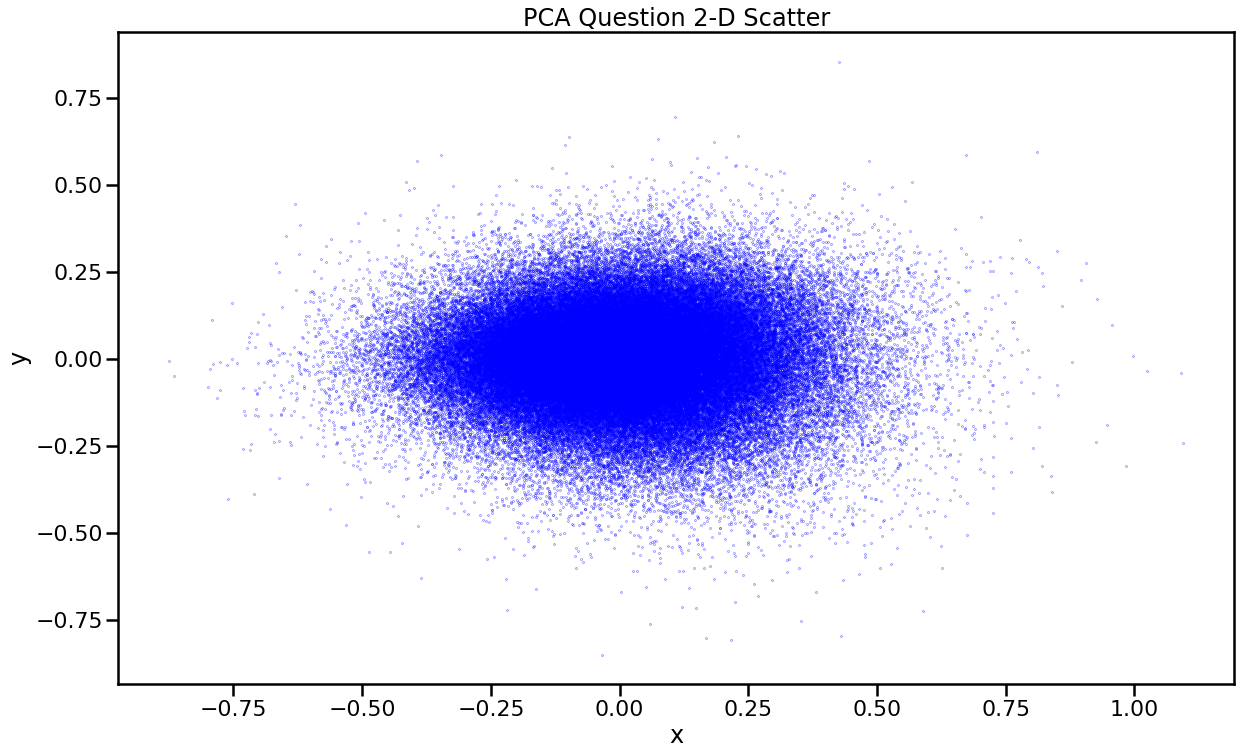

In [54]:
sns.set_context("poster")
ax1 = points.plot.scatter('x', 'y', s=0.1, figsize=(20, 12), c='b')
ax1.set_title('PCA Question 2-D Scatter')
fig = ax1.get_figure()
fig.savefig('pca_vector.png')

In [82]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    print(slice.shape)
    ax = slice.plot.scatter("x", "y", s=20, figsize=(10, 8), c='b')
    ax.set_title('Zoom In TSNE Question Vector')
    for i, point in slice.iterrows():
        ax.text(point.x - 0.05, point.y + 0.0005, point.question, fontsize=11)
    fig = ax.get_figure()
    return fig

(3, 3)


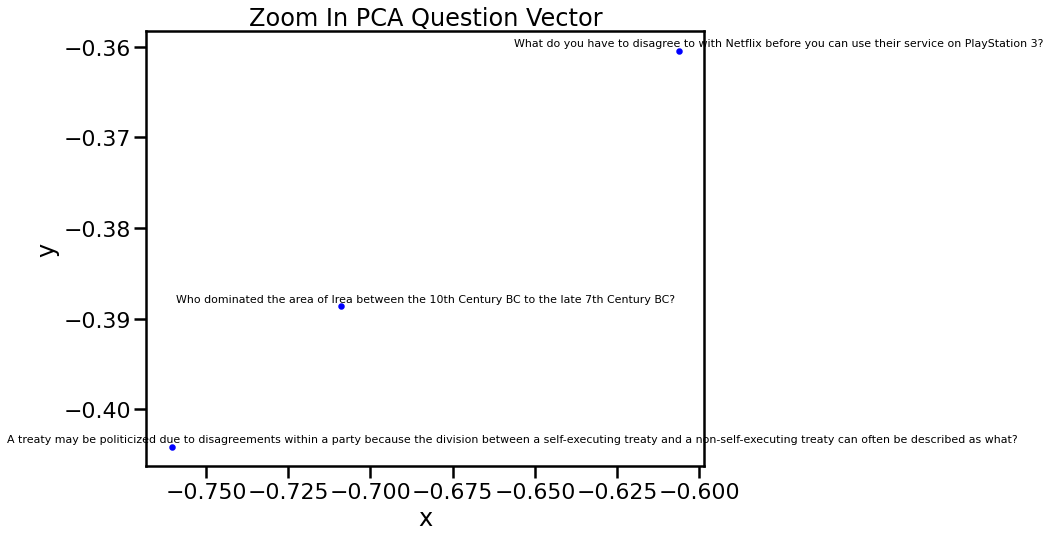

In [56]:
fig = plot_region(x_bounds=(-1, -0.6), y_bounds=(-0.5, -0.35))
fig.savefig('pca_vector_zoomin.png')

In [ ]:
fig = plot_region(x_bounds=(-1, -0.6), y_bounds=(-0.5, -0.35))
fig.savefig('TSNE_vector_zoomin.png')

## TSNE visualization

In [66]:
from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(n_jobs=4, n_components=2)
question_vector_2d = tsne.fit_transform(question_vector[:20000])

In [67]:
question_vector_2d[0]

array([13.95829475, -8.80186095])

In [68]:
qc2 = qc[:20000]
data = {'question': qc2['question'], 
        'x': question_vector_2d[:,0].tolist(), 'y': question_vector_2d[:,1].tolist()} 

points = pd.DataFrame(data)

In [69]:
points.head()

,question,x,y
0,When did Beyonce start becoming popular?,13.958295,-8.801861
1,What areas did Beyonce compete in when she was...,15.816796,-10.482681
2,When did Beyonce leave Destiny's Child and bec...,15.087239,-9.222309
3,In what city and state did Beyonce grow up?,12.162139,-8.741285
4,In which decade did Beyonce become famous?,0.234819,2.503862


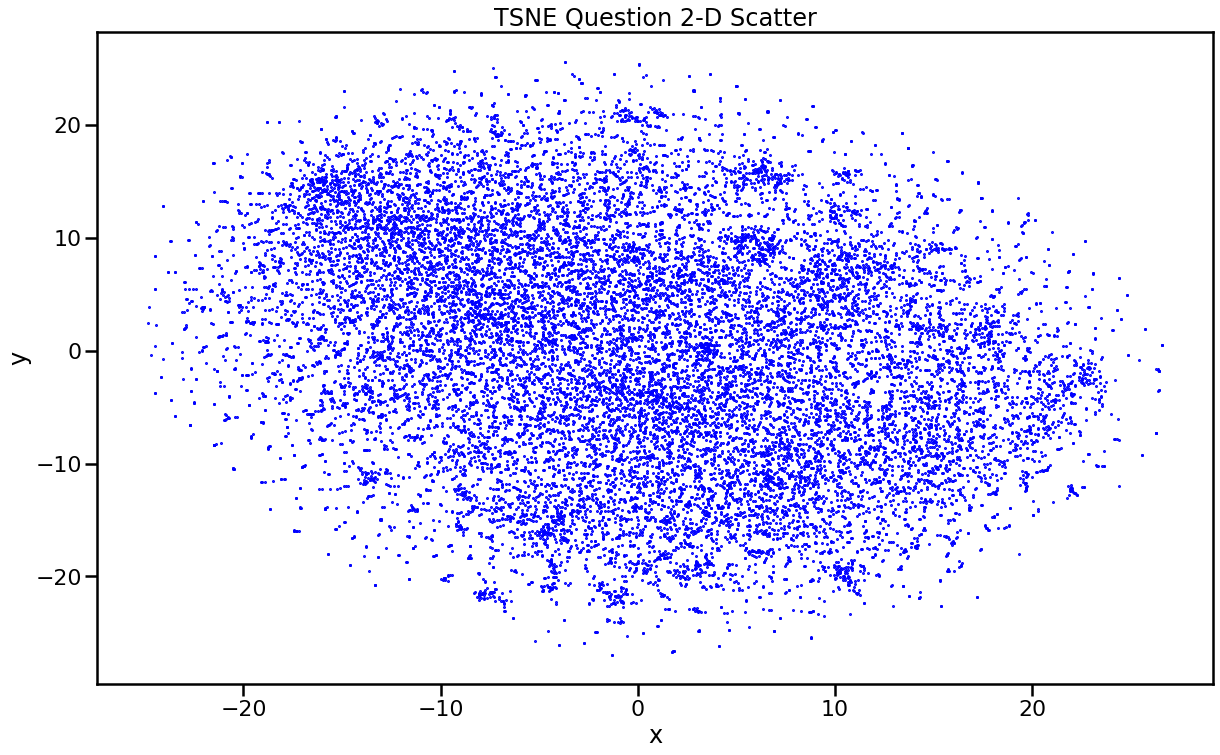

In [70]:
sns.set_context("poster")
ax1 = points.plot.scatter('x', 'y', s=1, figsize=(20, 12), c='b')
ax1.set_title('TSNE Question 2-D Scatter')
fig = ax1.get_figure()
fig.savefig('TSNE_vector.png')

(4, 3)


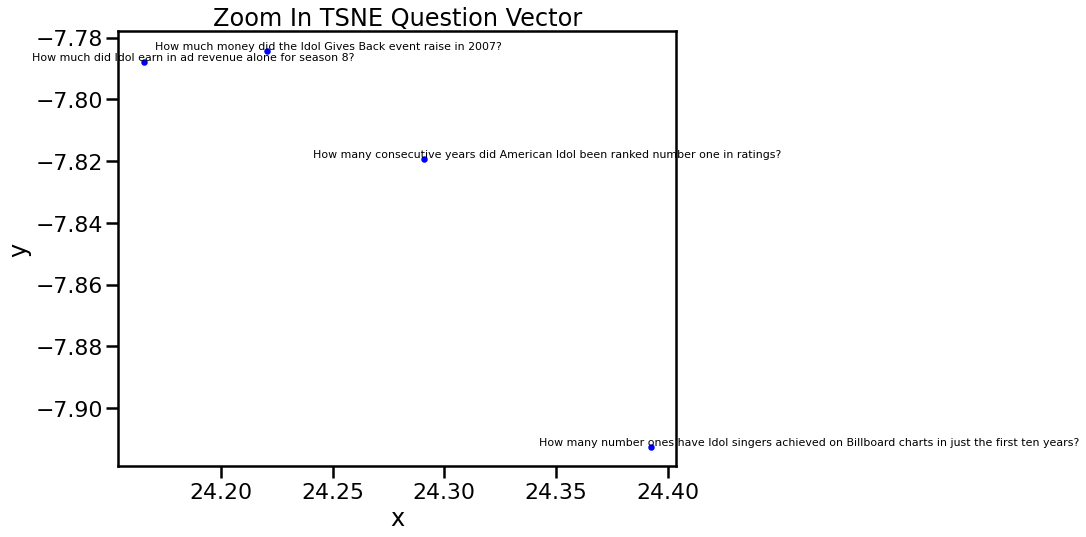

In [83]:
fig = plot_region(x_bounds=(24, 29), y_bounds=(-9, -7.6))
fig.savefig('TENE_vector_zoomin.png')

# Compare similarity

In [ ]:
from scipy import spatial

cos_distance = spatial.distance.cosine(vcc[0], vector)

In [ ]:
infer_vector1 = model.infer_vector(['How', 'old', 'are', 'you'])
infer_vector2 = model.infer_vector(['How', 'did', 'Beyonce', 'start', 'becoming', 'popular?'])
infer_vector3 = model.infer_vector(['When', 'did', 'Beyonce', 'start', 'becoming', 'popular?'])
similar_documents1 = model.docvecs.most_similar([infer_vector1], topn = 1)
similar_documents2 = model.docvecs.most_similar([infer_vector2], topn = 1)
similar_documents3 = model.docvecs.most_similar([infer_vector3], topn = 1)

In [ ]:
pca.transform(infer_vector3.reshape(1, 30))

array([[ 0.00603858, -0.02959222]], dtype=float32)

In [ ]:
question_vector_2d[0]

array([0.40030462, 0.16507483], dtype=float32)

In [ ]:
similar_documents3

[(134840, 0.8217315077781677)]

In [ ]:
qc.loc[similar_documents3[0][0],:]

question           After Findlay's charting how many islands of t...
context            The next European to visit was Arent Schuyler ...
question_vector    [0.03956378251314163, 0.08968336135149002, 0.0...
Name: 117433, dtype: object